# **Graph Theory: A Primer** - Part 2


><a href="https://www.cbs.mpg.de/en/cbs-coconut">CBS CoCoNUT @ MPI CBS</a>, April 2021
>
>(c) Mina Jamshidi (jamshidi@cbs.mpg.de) (<a href="https://github.com/minajamshidi/Python-Tutorials/tree/master/GraphTheory/CoCoNUT-April2021">GitHub</a>)
>
>(c) The book "*Networks*" of Mark Newman is used for creating this tutorial. Most of the real work examples are from this book. I did not cite them one by one.

In this tutorial we will learn about **centrality** in graphs, namely **degree centrality**, **eigenvector centrality**, **katz**, and **pagerank centrality**.

# Packages

first, import the following packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import eig


# Centrality 
Centrality is an index that we can compute for nodes. As its name says, *centrality* shows how much *central* a node is in the graph. The very central nodes are called *hubs*. therefore, the centrality index is also sometimes called the *hubness* of nodes. There are different ways for computing centrality. 



**Degree centrality**: The very simple, yet useful, way is the degree of nodes, which we learned about in the previous session. the degree centrality in many cases reveals important information about the newtork nodes. However, it is a quite *crude* measure of centrality. It awards a node *one centrality point* for each of its neighbors, regardless of the centrality of those neighbors.

* If $A=[a_{ij}]$ is the adjacency matrix of an undirected graph, then the following is the degree of node $i$:

    $d_i = \sum_{j=1}^{N} a_{ij}  \quad \quad \quad  \scriptstyle \text{(eq. 2.1)}$

* If $A=[a_{ij}]$ is the adjacency matrix of an directed graph, then we can define the inward and outward degree of node $i$:

    $d_i^{-} = \sum_{j=1}^{N} a_{ij}  \quad \quad \quad  \scriptstyle \text{(eq. 2.2)}$ 

    $d_i^{+} = \sum_{j=1}^{N} a_{ji} \quad \quad \quad  \scriptstyle \text{(eq. 2.3)}$


----


**Eigenvector centrality**: Eigenvector centrality has this idea that a node's importance is affected by the importance of its neighbors. For example, in a friendship network, if you are a friend of a very famous and powerful person, from the point of view of network science, you are a more important person. With this idea, eigenvector centrality awards a centrality point to a node <font color='blue'> proportional to the sum of the centrality of its neighbors</font>. 

Mathematically, the eigenvector centrality $x_i$ of node $i$ is defined as:

$x_i = \lambda^{-1} \sum \limits_{\substack{ \text{ nodes j that are} \\ \text{neighbors of i}}} x_j \quad \quad \quad  \scriptstyle \text{(eq. 2.4)}$      

In the above equation, $\lambda$ is a constant. Now, let's rewrite the equation:


$x_i = \lambda^{-1} \sum \limits_{j=1}^{N} a_{ij}x_j \quad \quad \quad  \scriptstyle \text{(eq. 2.5)}$



<font color='red'> **Exercise 2.1**</font> Is it clear why equation 2.4 and 2.5 are equivalent? 

Equation 2.5 can be written in matrix notation as $\mathbf{x}=\lambda^{-1} A\mathbf{x}$, which is eventually:

$A \mathbf{x} = \lambda \mathbf{x} \quad \quad \quad  \scriptstyle \text{(eq. 2.6)}$

with $\mathbf{x}$ as a vector with the centrality scores as its elements. Equation 2.6 is the eigenvector decompostion of the non-negative matrix $A$, and $\mathbf{x}$ is the eigenvector corresponing to the eigenvalue $\lambda$. But an $n\times n$ matrix has $n$ eignevalues. which one should we take? 


Based on a theorem called *Perron Frobenius theorem* we know that a non-negative matrix (like the adjacency matrix $A$) has only one eigenvector with all of its elements being non-negative, and that is the eigenvector corresponding to the largest eigenvalue, called the leading eigenvector. So, if we say that we want <font color='blue'>all of the centrality scores to be non-negative</font> then we have to take <font color='blue'>the leading eigenvector as the centrality score vector</font>.

<font color='red'> **Exercise 2.2**</font>: For a small random undirected graph that we generate, we wanna compute the degree and eigenvector centrality.

Tips: 
* For computing the eigenvectors use the `scipy.linalg.eig`, which is loaded at the beginning of the notebook. In order to use it, check its [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html). Then keep the eigenvector corresponding to the largest eigenvalue.


Note: `Networkx` provides you with functions to do so, but we just wanna do everything ourselves with the adjacency matrix $A$.

[Answer to Ex. 2.2](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex2-2.txt)

In [ ]:
G1 = nx.gnp_random_graph(20, 0.2, seed=12345)
A_G1 = nx.to_numpy_array(G1) # the adjacency matrix of graph G1

# Exercise 2.2 ****************

# Ex 2.2.1: compute the degree centrality ......
#c_degree_G1 = ...

# Ex 2.2.2: compute the eingenvector ......
# call the eigenvalue vector lamdda2_G1 and the eigenvector matrix eigvec_G1 . 

# ..., ... = eig(...)
    
# We only keep the real part 
eigvec_G1 = np.real(eigvec_G1)

# Ex 2.2.3: now find the index of the largest eigenvalue in lamdda2_G1

# ind1 = ...

# Ex 2.2.4: keep the column coressponding to ind1 as the eigenvector centrality

# c_eigcent_G1 = ...

# now we compute the rank of the nodes based on each centrality measure
node_rank_deg = np.argsort(np.argsort(c_degree_G1))
node_rank_eigcent = np.argsort(np.argsort(c_eigcent_G1))

print(node_rank_deg)
print(node_rank_eigcent)

# this functions from networkx computes the eigvec centrality
# c_eigenvector = nx.eigenvector_centrality(G1)
# c_eigenvector = list(c_eigenvector.values())


[15 16 12  3  4  8  9 10  1  2  6 19 17  7 18 14 13 11  5  0]
[11 15  7  5  6 14 13 10  1  2  4 12 19  8 18 17 16  9  3  0]


Plot the nework with colors and size of the nodes based on degree centrality:

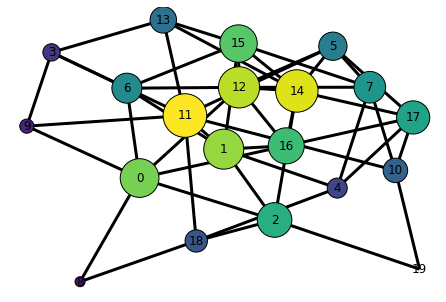

In [ ]:

pos = nx.spring_layout(G1, seed=5678910)
nx.draw(G1, pos, with_labels=True, node_color=node_rank_deg, edgecolors='black', 
        node_size=node_rank_deg*100, linewidths=1, width=3)

Plot the nework with colors and size of the nodes based on eigenvector centrality:

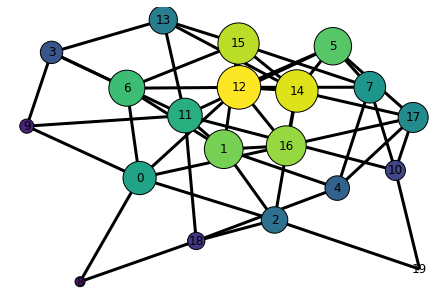

In [ ]:
pos = nx.spring_layout(G1, seed=5678910)
nx.draw(G1, pos, with_labels=True, node_color=node_rank_eigcent, edgecolors='black', 
        node_size=node_rank_eigcent*100, linewidths=1, width=3)

Now let's look at directed networks. For directed networks, since the adjacency matrix is not symmetric, it has two sets of eigenvectors: right ($A\mathbf{x}=\lambda \mathbf{x}$) and <font color='blue'>left ($A^T\mathbf{x}=\lambda \mathbf{x}$)</font>. <font color='blue'>The centrality that we get for node $i$ from left eigevector is affected by the centrlity of the nodes that point towards node $i$ </font>. This actually what makes sense about directed networks, think of two examples:

- WWW: a webpage that is pointed to by many other important pages should have a high centrality. On the other hand, any page can link to a lot of other pages (the latter can still be important, we assess this using other type of centrality).

- citation tree: <font color='blue'>an important paper is the one that is cited (or pointed to) by many other important papers</font>. 


Note: in some text books (like Newman's *Netoworks*) the adjacency matrix of a graph is defined as the transpose of our definition, i.e. $a_{ij}=1$ if $j$ points to $i$. In that way the eigenvector centrality is the right eigenvectors.


Now lets try it for a directed toy network:



<font color='red'> **Exercise 2.3**</font>:
We wanna see how eigenvector centrality works for the following graph:

<img src="https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/figures/example_eigvec_directed.svg" width="250">

1- Before going on with the coding part: pause a little bit. Discuss together the eigvector centrality of the nodes. I even suggest you to try to say exact values for the nodes' eigenvector centrality. 

2- Write the adjacency matrix of the graph in numpy array A, and plot it.

3- Check the eigenvectors: does it match to what you discussed in step 1?

[Answer to Ex. 2.3](https://github.com/minajamshidi/Python-Tutorials/raw/master/GraphTheory/CoCoNUT-April2021/Execise-answers/ex2-3.txt)

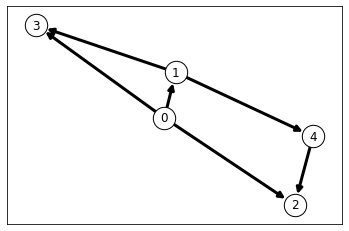

In [ ]:
# Exercise 2.3.2 ****************

# A = 

# *******************************

G2 = nx.DiGraph()
G2 = nx.from_numpy_array(A, create_using=G2)

options = {
    'node_color': 'white',
    'edgecolors': 'black',
    'node_size': 500,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    'with_labels': True,
    'linewidths': 1,
    'width': 3

}
nx.draw_networkx(G2, arrows=True, **options)

If we do the eigenvalue decomposition of $A^T$ we see that there are two types of solution: either the eigenvector elements are zero, or the eigenvalue is zero. The following shows the details:

$\begin{bmatrix} 0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 1\\
1 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\end{bmatrix} \begin{bmatrix} x_1\\ x_2\\x_3 \\ x_4 \\ x_5 \end{bmatrix} = \lambda \begin{bmatrix}  x_1\\ x_2\\x_3 \\ x_4 \\ x_5 \end{bmatrix}$ 

If we write the equations we have:

$0 = \lambda x_1 \rightarrow x_1=0 \quad or \quad \lambda=0$

$x_1 = \lambda x_2  \rightarrow x_2=0$

$x_1 + x_5 = \lambda x_3  \rightarrow x_3=0$

$x_1 + x_2 = \lambda x_4  \rightarrow x_4=0$

$x_2 = \lambda x_5  \rightarrow x_5=0$

Or $\lambda=0$.

As you can see, <font color='blue'>all the eigenvectors of A have zero elements or the eigenvalues are zero</font>. That means all the nodes have centrality zero. Therefore, this eigenvector centrality is useless for this network! 

As far as we are working with undirected graphs, eigenvector centrality seems to function well. However, in this simple toy example you saw that eigenvector centrality may run into trouble with directed graphs. We don't go in detail in the mathematical conditions that make this happen, but it turns out that eigenvector centrality is totally useless for some types of networks, for example citation tree. Therefore, we have to find a criterion for that can overcome this problem of being contingent on only the in-comming links.

------

**Katz centrality**: one solution to the above problem is to give a little bit of importance (centrality) to every node - regardless of their role in the network. How would it be in the formuations?

$x_i = \alpha \sum_{j}a_{ji} x_j + \beta  \quad \quad \quad  \scriptstyle \text{(eq. 2.6)}$




<font color='red'> **Exercise 2.4**</font>: Discuss the Katz centrality equation in the group. Is the difference to eigenvector centrality clear to all of us?

In the above equation, each node gets at least an amount of centrality equal to $\beta$. But one problem is that a high centrality node will grant high centrality to all the nodes that it points to. 

 An example:
- We all agree that Amazon is a hub by any sensible measure of centrality. It points to a lot of seller websites. With the definition of eigenvector centrality and Katz centrality, all the sellers that sell something on Amazon will have high centrality. Does it make sense?
------



**PageRank centrality**: Most often, it means less if a node is one among many other nodes that an important node points to. So, the idea of pagerank centrality is to share the centrality of a node between its neighbors. If an important website points to 10 other websites, they receive more centrality points than if that important website points to 1000 websites. We do this *sharing* by modifying the Katz centrality as the centrality of a node is proportional to the centrality of its neighbors *devided by their out-degree*. See the following equation:

$x_i = \alpha \sum_{j}a_{ji} \frac{x_j}{k_j^{out}} + \beta  \quad \quad \quad  \scriptstyle \text{(eq. 2.7)}$

For the nodes that do not have any out-going edge, we put $k_j^{out}=1$. You can see that this does not affect the computations because $a_{ji}=0$ for all values of $i$.

Google's pagerank algorith uses $\alpha=0.85$, this is also used in other networks. There seems to be no specific reason for this choice though.


We use `Networkx`'s pagerank function to compute the pagerank centrality of the graph in ex. 2.3. 

In [ ]:
pr_G2 = nx.pagerank(G2, alpha=0.85)
print(list(pr_G2.values()))

[0.12114667860014305, 0.15547188658952255, 0.3146115929001003, 0.2215475249498069, 0.18722231696042738]


# A note about undirected networks

For undirected networks, eigenvector centrality works properly. A question can be, what about Katz and pagerank centrality for undirected networks?

As far as we keep the parameter $\beta$ in Katz and PageRank centrality measures, they are not equivalent to any other measures. However, from the flow, remember that we added $\beta$ for the problems that we could face in directed networks and as Newman writes, *for undirected networks, [...] the added term $\beta$ term is not really needed*. For undirected networks and if we omit $\beta$ from Katz centrality, it will be eigenvector centrality. Regarding PgeRank, if we deleter $\beta$ from eq. 2.7, for an undirected graph it will be:

$x_i = \alpha \sum_{j}a_{ji} \frac{x_j}{k_j}  \quad \quad \quad  \scriptstyle \text{(eq. 2.8)}$

where $k_j$ is node j's degree. It turns out that eq. 2.8 has the solution of $x_i=k_i$ and $\alpha=1$, which is the degree centrality.

----
# Conclusion

We have also other types of centrality, e.g. betweenness centrality, participation coefficient. We did not cover them here. But I hope this tutorial can help you understand the centrality measures better AND be sensitive to their drawback ad implications in different types of networks. We have to always decide on the centrality measure based on the application.
